# 00. Install Libraries

In [ ]:
!pip install transformers

In [4]:
import logging
import re
from transformers import AutoTokenizer, AutoModelForCausalLM

# Set logging level to suppress the informational messages
logging.getLogger("transformers.generation_utils").setLevel(logging.ERROR)

# 01. Download code Llama 7b models: base, python, Instruct

In [ ]:
# The code llama base model requires google colab pro + inorder to run ($50 per month subscription)
# Step 1: Load the tokenizer and model from Hugging Face - Base line model
model_name = "codellama/CodeLlama-7b-hf"  # Baseline
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

In [ ]:
# The code llama python and instruct models need more compute that requires additional payments from Huggingface
# Step 1: Load the tokenizer and model from Hugging Face - python line model
python_model_name = "codellama/CodeLlama-7b-Python-hf"  # Baseline
python_tokenizer = AutoTokenizer.from_pretrained(python_model_name)
python_model = AutoModelForCausalLM.from_pretrained(python_model_name)

In [ ]:
# Step 1: Load the tokenizer and model from Hugging Face - Instruct line model
instruct_model_name = "codellama/CodeLlama-7b-Instruct-hf"  # Instruct
instruct_tokenizer = AutoTokenizer.from_pretrained(instruct_model_name)
instruct_model = AutoModelForCausalLM.from_pretrained(instruct_model_name)

# 02. Evaluation

# Evaluation Prompt:
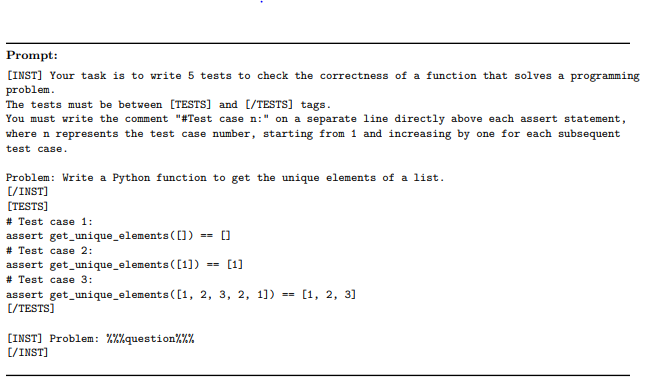

# Code Llama 7B

In [12]:
import re

# Step 2: Create a prompt for the model
prompt = """ [INST] Your task is to write 5 tests to check the correctness of a function that solves a programming
problem.
The tests must be between [TESTS] and [/TESTS] tags.
You must write the comment "#Test case n:" on a separate line directly above each assert statement,
where n represents the test case number, starting from 1 and increasing by one for each subsequent
test case.
Problem: Write a Python function to get the unique elements of a list.
[/INST]
[TESTS]
# Test case 1:
assert get_unique_elements([]) == []
# Test case 2:
assert get_unique_elements([1]) == [1]
# Test case 3:
assert get_unique_elements([1, 2, 3, 2, 1]) == [1, 2, 3]
[/TESTS]
[INST] Problem: %%%question%%%
[/INST]
"""

# Step 3: Tokenize the prompt and generate a response
inputs = tokenizer(prompt, return_tensors="pt")
outputs = model.generate(**inputs, max_length=500, num_return_sequences=1)

# Decode the outputs to a string
decoded_outputs = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Now apply the regex on the decoded string
#extracted_text = re.search(r'\\begin{blockquote}\n\n(.*?)\n\\end{blockquote}', decoded_outputs, re.DOTALL)

print("Input Prompt:", prompt)
print("========================================")
print("========================================")
print("\nOutput:\n", decoded_outputs)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Input Prompt:  [INST] Your task is to write 5 tests to check the correctness of a function that solves a programming
problem.
The tests must be between [TESTS] and [/TESTS] tags.
You must write the comment "#Test case n:" on a separate line directly above each assert statement,
where n represents the test case number, starting from 1 and increasing by one for each subsequent
test case.
Problem: Write a Python function to get the unique elements of a list.
[/INST]
[TESTS]
# Test case 1:
assert get_unique_elements([]) == []
# Test case 2:
assert get_unique_elements([1]) == [1]
# Test case 3:
assert get_unique_elements([1, 2, 3, 2, 1]) == [1, 2, 3]
[/TESTS]
[INST] Problem: %%%question%%%
[/INST]


Output:
  [INST] Your task is to write 5 tests to check the correctness of a function that solves a programming
problem.
The tests must be between [TESTS] and [/TESTS] tags.
You must write the comment "#Test case n:" on a separate line directly above each assert statement,
where n represents the

# Code Llama - Python

In [ ]:
import re
# Step 2: Create a prompt for the model
prompt = """ [INST] Your task is to write 5 tests to check the correctness of a function that solves a programming
problem.
The tests must be between [TESTS] and [/TESTS] tags.
You must write the comment "#Test case n:" on a separate line directly above each assert statement,
where n represents the test case number, starting from 1 and increasing by one for each subsequent
test case.
Problem: Write a Python function to get the unique elements of a list.
[/INST]
[TESTS]
# Test case 1:
assert get_unique_elements([]) == []
# Test case 2:
assert get_unique_elements([1]) == [1]
# Test case 3:
assert get_unique_elements([1, 2, 3, 2, 1]) == [1, 2, 3]
[/TESTS]
[INST] Problem: %%%question%%%
[/INST]
"""

# Step 3: Tokenize the prompt and generate a response
inputs = python_tokenizer(prompt, return_tensors="pt")
outputs = python_model.generate(**inputs, max_length=50, num_return_sequences=1)

# Decode the outputs to a string
decoded_outputs = python_tokenizer.decode(outputs[0], skip_special_tokens=True)

# Now apply the regex on the decoded string
extracted_text = re.search(r'\\begin{blockquote}\n\n(.*?)\n\\end{blockquote}', decoded_outputs, re.DOTALL)

if extracted_text:
    blockquote_text = extracted_text.group(1).strip()
    print("\n\nOutput:")
    print(blockquote_text)
else:
    print("No blockquote text found")

In [ ]:
import re
# Step 2: Create a prompt for the model
prompt = """ [INST] Your task is to write 5 tests to check the correctness of a function that solves a programming
problem.
The tests must be between [TESTS] and [/TESTS] tags.
You must write the comment "#Test case n:" on a separate line directly above each assert statement,
where n represents the test case number, starting from 1 and increasing by one for each subsequent
test case.
Problem: Write a Python function to get the unique elements of a list.
[/INST]
[TESTS]
# Test case 1:
assert get_unique_elements([]) == []
# Test case 2:
assert get_unique_elements([1]) == [1]
# Test case 3:
assert get_unique_elements([1, 2, 3, 2, 1]) == [1, 2, 3]
[/TESTS]
[INST] Problem: %%%question%%%
[/INST]
"""

# Step 3: Tokenize the prompt and generate a response
inputs = instruct_tokenizer(prompt, return_tensors="pt")
outputs = instruct_model.generate(**inputs, max_length=50, num_return_sequences=1)

# Decode the outputs to a string
decoded_outputs = instruct_tokenizer.decode(outputs[0], skip_special_tokens=True)

# Now apply the regex on the decoded string
extracted_text = re.search(r'\\begin{blockquote}\n\n(.*?)\n\\end{blockquote}', decoded_outputs, re.DOTALL)

if extracted_text:
    blockquote_text = extracted_text.group(1).strip()
    print("\n\nOutput:")
    print(blockquote_text)
else:
    print("No blockquote text found")

# Gemma 7B
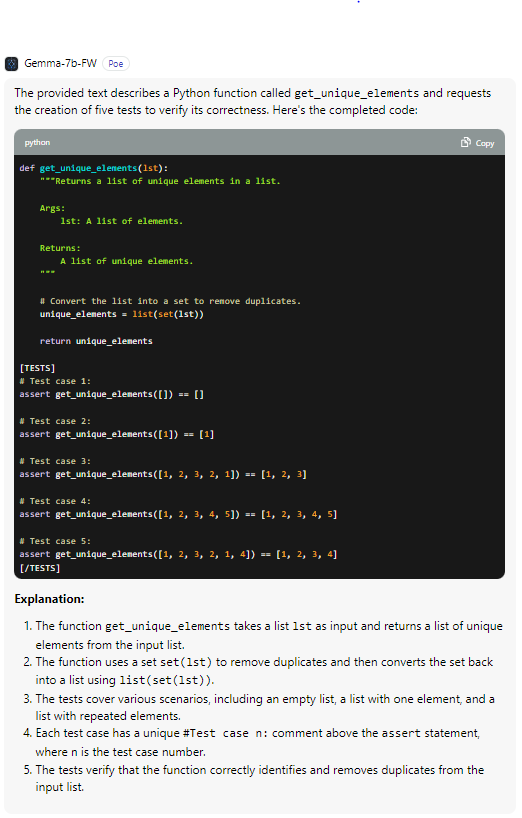

# Gemini Pro
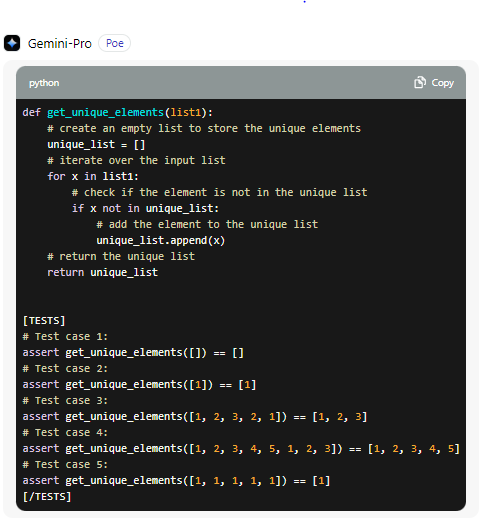

# GPT4 (ChatGPT)
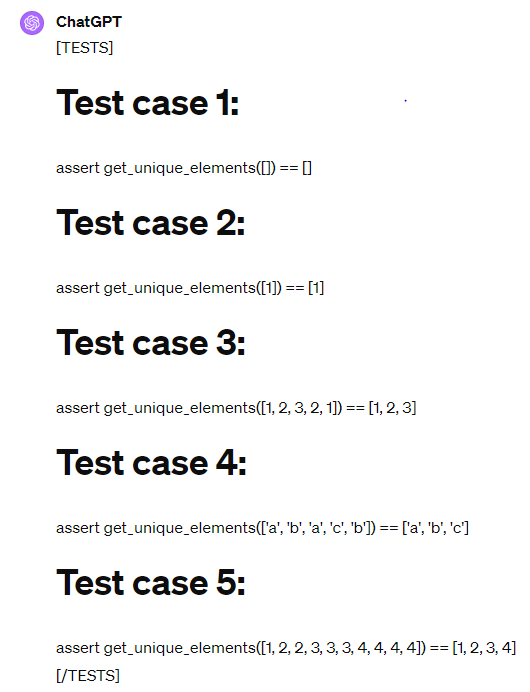

# Claude 3 Opus
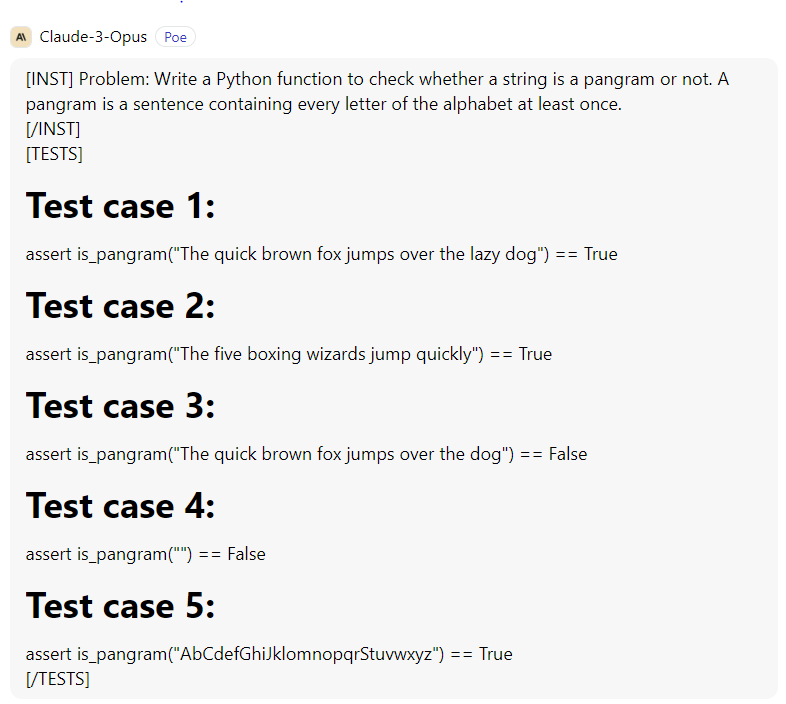